In [20]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline  

In [2]:
df = pd.read_csv('cleaned_sales_data.csv')
df = df.drop('Unnamed: 0' , 1)

In [3]:
df['date'] = df['date'].map( lambda x: datetime.strptime( x, '%Y-%m-%d'))
df['weekofyear'] = df['date'].dt.weekofyear
df['month'] = df['date'].dt.month

In [24]:
df['weekday'] = df['date'].dt.weekday
df['dayofyear'] = df['date'].dt.dayofyear

In [25]:
# filter
df[:10]

,EAN,Produkttekst,avance,chain_store,date,oms,postal_no,store_name,store_no,volume,weekofyear,month,weekday,dayofyear
0,5741000116975,Royal B X-mas 6x33ds,1,DagliBrugsen,2015-01-01,31.00,2300,COOP DAGLIBR BRYDES ALLE,1043,1,1,1,3,1
1,5741000131084,Royal Export 6x33 ds,-13,DagliBrugsen,2015-01-01,100.00,2300,COOP DAGLIBR BRYDES ALLE,1043,4,1,1,3,1
2,5741000140284,ROYAL PLATINUM 6-PAK,8,DagliBrugsen,2015-01-01,39.95,2300,COOP DAGLIBR BRYDES ALLE,1043,1,1,1,3,1
3,5741000131084,Royal Export 6x33 ds,17,DagliBrugsen,2015-01-01,79.90,2400,COOP DAGLIBR BISPEPARKEN,1053,2,1,1,3,1
4,5741000132463,Royal Exp. kuffert24,-19,DagliBrugsen,2015-01-01,299.85,2650,COOP LOKALBR FJELDSTEDVEJ,1082,3,1,1,3,1
5,5741000131084,Royal Export 6x33 ds,9,DagliBrugsen,2015-01-01,39.95,4000,COOP DAGLIBR GEVNINGE,1099,1,1,1,3,1
6,5741000116494,Royal Class. 6x33 ds,8,DagliBrugsen,2015-01-01,38.95,4000,DAGLIBRUGSEN GUNDSØMAGLE,1104,1,1,1,3,1
7,5741000125021,Royal Stout 33 cl ds,6,DagliBrugsen,2015-01-01,21.50,4000,DAGLIBRUGSEN GUNDSØMAGLE,1104,2,1,1,3,1
8,5741000132456,Royal Class. 24ds,-4,DagliBrugsen,2015-01-01,99.95,4000,DAGLIBRUGSEN GUNDSØMAGLE,1104,1,1,1,3,1
9,5741000132463,Royal Exp. kuffert24,-6,DagliBrugsen,2015-01-01,99.95,4000,DAGLIBRUGSEN GUNDSØMAGLE,1104,1,1,1,3,1


## Value / month

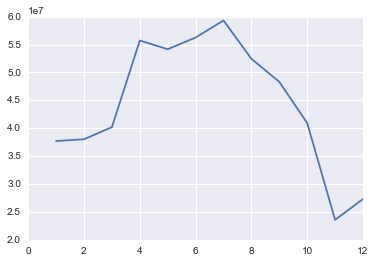

In [21]:
agg_month_value = df.groupby('month')['oms'].sum()
plt.plot(agg_month_value.index.values , agg_month_value.values )
plt.show()

## Value / week

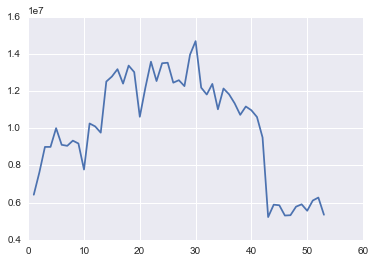

In [27]:
agg_week_value = df.groupby('weekofyear')['oms'].sum()
plt.plot(agg_week_value.index.values , agg_week_value.values )
plt.show()

## value / week day

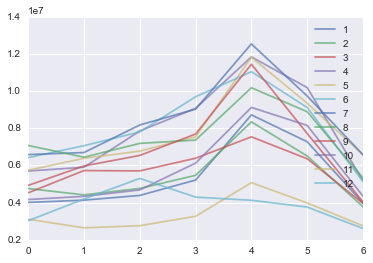

In [28]:
for m in set(df['month']):
    x = df[ df['month'] == m ]
    agg = x.groupby('weekday')['oms'].sum()
    plt.plot(agg.index.values , agg.values , label=m, alpha=0.7)
plt.legend()
plt.show()

## postal code

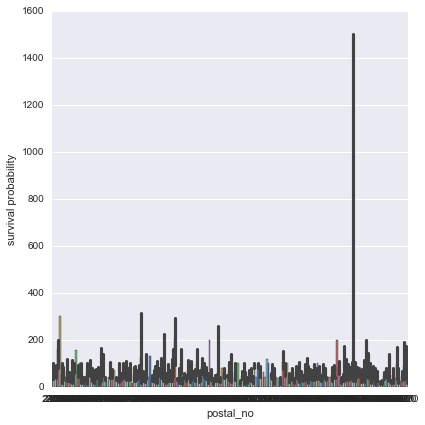

In [30]:
# Draw a nested barplot to show survival for class and sex
g = sns.factorplot(x="postal_no", y="oms", data=df[:1000],
                   size=6, kind="bar", palette="muted") #, hue="sex"
g.despine(left=True)
g.set_ylabels("survival probability")